In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("masterClean.csv")
df.head(20)

Unnamed: 0  country  year     sex          age  suicides_no  population  \
0            0  Albania  1987    male  15-24 years           21      312900   
1            1  Albania  1987    male  35-54 years           16      308000   
2            2  Albania  1987  female  15-24 years           14      289700   
3            3  Albania  1987    male    75+ years            1       21800   
4            4  Albania  1987    male  25-34 years            9      274300   
5            5  Albania  1987  female    75+ years            1       35600   
6            6  Albania  1987  female  35-54 years            6      278800   
7            7  Albania  1987  female  25-34 years            4      257200   
8            8  Albania  1987    male  55-74 years            1      137500   
9            9  Albania  1987  female   5-14 years            0      311000   
10          10  Albania  1987  female  55-74 years            0      144600   
11          11  Albania  1987    male   5-14 years            0      338200   
12          12  Albania  1988  female    75+ years            2       36400   
13          13  Albania  1988    male  15-24 years           17      319200   
14          14  Albania  1988    male    75+ years            1       22300   
15          15  Albania  1988    male  35-54 years           14      314100   
16          16  Albania  1988    male  55-74 years            4      140200   
17          17  Albania  1988  female  15-24 years            8      295600   
18          18  Albania  1988  female  55-74 years            3      147500   
19          19  Albania  1988  female  25-34 years            5      262400   

    suicides/100k pop country-year  gdp_for_year ($)   gdp_per_capita ($)  \
0                6.71  Albania1987      2,156,624,900                 796   
1                5.19  Albania1987      2,156,624,900                 796   
2                4.83  Albania1987      2,156,624,900                 796   
3                4.59  Albania1987      2,156,624,900                 796   
4                3.28  Albania1987      2,156,624,900                 796   
5                2.81  Albania1987      2,156,624,900                 796   
6                2.15  Albania1987      2,156,624,900                 796   
7                1.56  Albania1987      2,156,624,900                 796   
8                0.73  Albania1987      2,156,624,900                 796   
9                0.00  Albania1987      2,156,624,900                 796   
10               0.00  Albania1987      2,156,624,900                 796   
11               0.00  Albania1987      2,156,624,900                 796   
12               5.49  Albania1988      2,126,000,000                 769   
13               5.33  Albania1988      2,126,000,000                 769   
14               4.48  Albania1988      2,126,000,000                 769   
15               4.46  Albania1988      2,126,000,000                 769   
16               2.85  Albania1988      2,126,000,000                 769   
17               2.71  Albania1988      2,126,000,000                 769   
18               2.03  Albania1988      2,126,000,000                 769   
19               1.91  Albania1988      2,126,000,000                 769   

         generation continent  
0      Generation X        EU  
1            Silent        EU  
2      Generation X        EU  
3   G.I. Generation        EU  
4           Boomers        EU  
5   G.I. Generation        EU  
6            Silent        EU  
7           Boomers        EU  
8   G.I. Generation        EU  
9      Generation X        EU  
10  G.I. Generation        EU  
11     Generation X        EU  
12  G.I. Generation        EU  
13     Generation X        EU  
14  G.I. Generation        EU  
15           Silent        EU  
16  G.I. Generation        EU  
17     Generation X        EU  
18  G.I. Generation        EU  
19          Boomers        EU

In [45]:
#df.drop(columns=["Unnamed: 0"], inplace=True)
df["continent"] = df["continent"].fillna("NA")

In [4]:
df["age"].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

# 1. Analisis global
## Tendencia global

In [5]:
#Suicidios globales por cada 100k habitantes, 1985-2015.  X=year Y=Suicidios/100k
df_Tendencia = df[["year","suicides_no","population"]]

In [6]:
df_Tendencia

year  suicides_no  population
0      1987           21      312900
1      1987           16      308000
2      1987           14      289700
3      1987            1       21800
4      1987            9      274300
...     ...          ...         ...
27649  2014          107     3620833
27650  2014            9      348465
27651  2014           60     2762158
27652  2014           44     2631600
27653  2014           21     1438935

[27654 rows x 3 columns]

In [7]:
df_groupT = df_Tendencia.groupby("year")

In [8]:
for name,groups in df_groupT:
    print(name)
    print(groups)

1985
       year  suicides_no  population
264    1985            0        7709
265    1985            0        6344
266    1985            0        6173
267    1985            0        7339
268    1985            0        3778
...     ...          ...         ...
27061  1985           16      347300
27062  1985            5      240000
27063  1985            3      203000
27064  1985            2      263100
27065  1985            1      271000

[564 rows x 3 columns]
1986
       year  suicides_no  population
276    1986            0        7668
277    1986            0        6209
278    1986            0        6101
279    1986            0        6907
280    1986            0        3764
...     ...          ...         ...
27073  1986           12      241800
27074  1986            8      204500
27075  1986            8      349600
27076  1986            2      273000
27077  1986            0      265000

[576 rows x 3 columns]
1987
       year  suicides_no  population
0      1987 

In [9]:
population = df_groupT["population"].sum()

In [10]:
population = population[0:-1]

In [11]:
population

year
1985    1008533686
1986    1029909613
1987    1095029726
1988    1054094424
1989    1225514347
1990    1466581000
1991    1489949284
1992    1569500347
1993    1530416654
1994    1548749372
1995    1591559103
1996    1662267662
1997    1702991519
1998    1725181351
1999    1776337963
2000    1799202539
2001    1755565489
2002    1822152815
2003    1838458020
2004    1745246613
2005    1734881381
2006    1840908837
2007    1859564353
2008    1860620851
2009    1973620817
2010    1994548889
2011    1989236841
2012    1912812088
2013    1890161710
2014    1904772042
2015    1774657932
Name: population, dtype: int64

In [12]:
suicides = df_groupT["suicides_no"].sum()
suicides = suicides[:-1]
suicides

year
1985    116063
1986    120670
1987    126842
1988    121026
1989    160244
1990    193361
1991    198020
1992    211473
1993    221565
1994    232063
1995    243544
1996    246725
1997    240745
1998    249591
1999    256117
2000    255831
2001    250652
2002    256095
2003    256079
2004    240861
2005    234374
2006    233361
2007    233408
2008    235447
2009    243474
2010    238689
2011    236437
2012    230160
2013    223199
2014    222664
2015    203640
Name: suicides_no, dtype: int64

In [13]:
suicides_per_100k = ((suicides/population)*100000).tolist()

In [14]:
suicides_per_100k

[11.508093543243334,
 11.716562160100937,
 11.583429836497425,
 11.481514107696295,
 13.075652716124424,
 13.184474638632302,
 13.290385258509243,
 13.473905909241573,
 14.477430013643854,
 14.983896309854323,
 15.302227830617989,
 14.842675800066186,
 14.136594182299039,
 14.46752249294399,
 14.418258537212832,
 14.219132891074695,
 14.277564783001951,
 14.054529230030578,
 13.929009921042416,
 13.80097220678577,
 13.509511518586065,
 12.676401748404448,
 12.551757061993971,
 12.654216998237864,
 12.33641223799475,
 11.96706690502185,
 11.88581445541406,
 12.032546293695317,
 11.808460557589012,
 11.689797786311692,
 11.474887431996668]

In [15]:
years = df["year"].unique().tolist()
years = years[:-1]
years.sort()
years

[1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [16]:
#Algunos parametros para graficar antes.
font1 = {'family':'sans serif','color':'black','size':20}
titulo = "Suicidios Globales(p/100k)"
subtitulo = "Tendencia a lo largo del tiempo, 1985-2015"

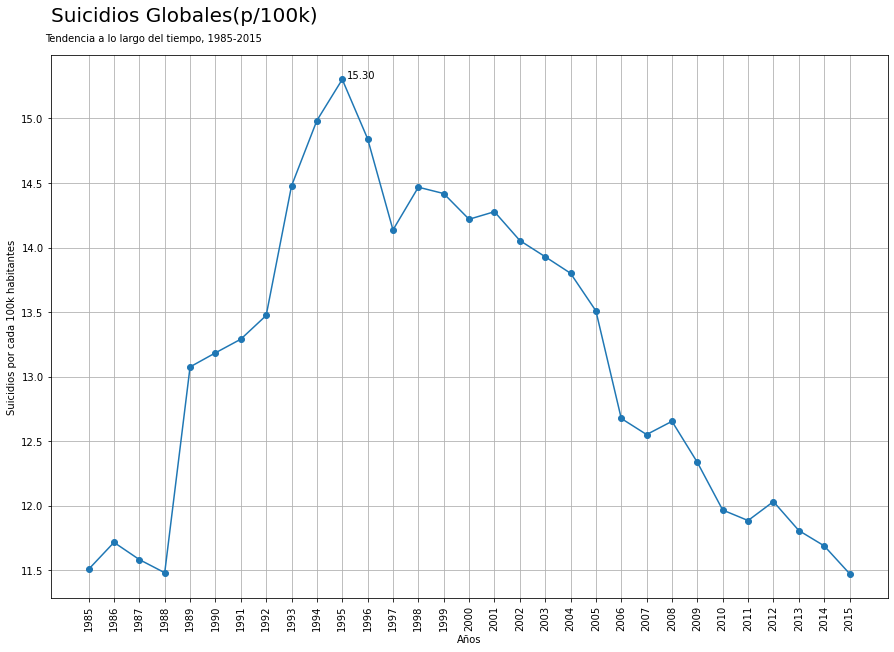

In [17]:
#Ahora si a graficar.
plt.figure(figsize=(15,10))
plt.suptitle(subtitulo,fontsize=10,x=0.22,y=0.91)
plt.title(titulo,fontdict=font1,loc="left",x=0,y=1.05)
plt.xlabel("Años")
plt.ylabel("Suicidios por cada 100k habitantes")
plt.xticks(years,rotation=90)
plt.grid(True)
plt.annotate("15.30",(1995.2,15.31))
plt.plot(years,suicides_per_100k,'-o')

### Insights 
* Del año 1988-1989 hubo un crecimiento drastico (que pudo desencadenarlo?).
* El maximo pico de suicidios se alcanzo en 1995 con un promedio de 15.3 muertes por cada 100k habitantes.
* La tasa de suicidios se redujo de forma constante hasta el 2015(ultimo año analizado)
* La tasa apenas se redujo hasta lo previo a los 90 (que ocurrio?)

## Por continente

In [18]:
df_Tendencia_Cont = df[["year","suicides_no","population","continent"]]

In [19]:
df_Tendencia_Cont

year  suicides_no  population continent
0      1987           21      312900        EU
1      1987           16      308000        EU
2      1987           14      289700        EU
3      1987            1       21800        EU
4      1987            9      274300        EU
...     ...          ...         ...       ...
27649  2014          107     3620833        AS
27650  2014            9      348465        AS
27651  2014           60     2762158        AS
27652  2014           44     2631600        AS
27653  2014           21     1438935        AS

[27654 rows x 4 columns]

In [20]:
df_groupT_C = df_Tendencia_Cont.groupby("continent")

In [21]:
for names,groups in df_groupT_C:
    print(names)
    print(groups)

AF
       year  suicides_no  population continent
16134  1985            2        8800        AF
16135  1985           19       88500        AF
16136  1985           18       89500        AF
16137  1985            9       45300        AF
16138  1985           21      109400        AF
...     ...          ...         ...       ...
23357  2015           26     6396045        AF
23358  2015            2      615701        AF
23359  2015           10     3155486        AF
23360  2015           11     5318168        AF
23361  2015            6     5243427        AF

[838 rows x 4 columns]
AS
       year  suicides_no  population continent
960    1990           25      332700        AS
961    1990            2       26900        AS
962    1990           11      183800        AS
963    1990           16      307100        AS
964    1990           15      358000        AS
...     ...          ...         ...       ...
27649  2014          107     3620833        AS
27650  2014            9      

In [22]:
continentes = df["continent"].unique().tolist()
continentes.sort() #NA = North America, SA = South America

In [23]:
suicides_C = df_groupT_C["suicides_no"].sum()
suicides_C

continent
AF      11313
AS    1455692
EU    3408125
NA    1340639
OC      84851
SA     446980
Name: suicides_no, dtype: int64

In [24]:
population_C = df_groupT_C["population"].sum()

In [25]:
population_C

continent
AF      907935487
AS    10142834343
EU    18842703778
NA    12746171957
OC      654397213
SA     8008918797
Name: population, dtype: int64

In [26]:
suicides_per_100k_C = (suicides_C/population_C)*100000
suicides_per_100k_C

continent
AF     1.246014
AS    14.351925
EU    18.087240
NA    10.517974
OC    12.966284
SA     5.581028
dtype: float64

In [27]:
suicides_per_100k_C = list(suicides_per_100k_C)
suicides_per_100k_C

[1.2460136388522944,
 14.351925219055111,
 18.08723970908672,
 10.517973588640798,
 12.966283827984459,
 5.5810279930348505]

### Grafica suicidios por continente(per 100k)

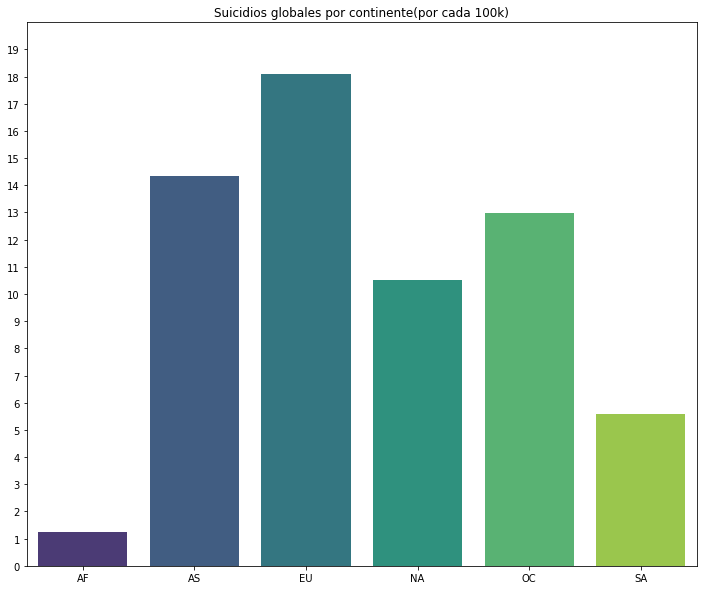

In [28]:
plt.figure(figsize=(12,10))
plt.title("Suicidios globales por continente(por cada 100k)")
plt.ylim([0,20])
plt.yticks(np.arange(0,20,step=1))
sns.barplot(x = continentes,y = suicides_per_100k_C,palette = "viridis")
plt.show()

### Tendencia de suicidios a lo largo del tiempo, por continente

In [29]:
#X = Años, Y = ratio por año
df_groupT_C1 = df_Tendencia_Cont.groupby(["year","continent"])

In [30]:
for names,groups in df_groupT_C1:
    print(names)
    print(groups)

(1985, 'AF')
       year  suicides_no  population continent
16134  1985            2        8800        AF
16135  1985           19       88500        AF
16136  1985           18       89500        AF
16137  1985            9       45300        AF
16138  1985           21      109400        AF
16139  1985           18      106300        AF
16140  1985            4       47900        AF
16141  1985            6       87200        AF
16142  1985            6       90500        AF
16143  1985            1      104700        AF
16144  1985            0      100900        AF
16145  1985            0        4400        AF
22018  1985            3        4400        AF
22019  1985            3        7700        AF
22020  1985            1        2800        AF
22021  1985            1        7500        AF
22022  1985            0        4200        AF
22023  1985            0        4800        AF
22024  1985            0        7700        AF
22025  1985            0        3500        AF


       year  suicides_no  population continent
60     1994            2       24600        EU
61     1994           11      171400        EU
62     1994            2       39900        EU
63     1994            6      231400        EU
64     1994            9      362800        EU
...     ...          ...         ...       ...
26425  1994          324     7557704        EU
26426  1994          176     4606941        EU
26427  1994           82     3674808        EU
26428  1994            9     3837961        EU
26429  1994            4     3642837        EU

[336 rows x 4 columns]
(1994, 'NA')
       year  suicides_no  population continent
372    1994            0        6083        NA
373    1994            0        7151        NA
374    1994            0        7357        NA
375    1994            0        7722        NA
376    1994            0        3715        NA
...     ...          ...         ...       ...
26797  1994         1179    21456100        NA
26798  1994         105

(2004, 'AF')
       year  suicides_no  population continent
16362  2004           22       96551        AF
16363  2004           34      175824        AF
16364  2004            2       11376        AF
16365  2004           11       98158        AF
16366  2004            6       60315        AF
16367  2004            6       97926        AF
16368  2004            5       96083        AF
16369  2004            8      175289        AF
16370  2004            3       70970        AF
16371  2004            0       99417        AF
16372  2004            0       19076        AF
16373  2004            0      102106        AF
22090  2004            3       11676        AF
22091  2004            2        7889        AF
22092  2004            1        8174        AF
22093  2004            0        7790        AF
22094  2004            0        7836        AF
22095  2004            0       11572        AF
22096  2004            0        7148        AF
22097  2004            0        4059        AF


[90 rows x 4 columns]
(2016, 'NA')
       year  suicides_no  population continent
10646  2016            0        9543        NA
10647  2016            0       10271        NA
10648  2016            0       11222        NA
10649  2016            0        6392        NA
10650  2016            0        2227        NA
10651  2016            0        9860        NA
10652  2016            0       10718        NA
10653  2016            0       11746        NA
10654  2016            0        5721        NA
10655  2016            0        1312        NA


In [31]:
population_CY = df_groupT_C1["population"].sum()
population_CY

year  continent
1985  AF              940700
      AS           217624243
      EU           255560980
      NA           322722749
      OC            17588300
                     ...    
2015  SA           309567680
2016  AF              992432
      AS            58766499
      EU            70096364
      NA               79012
Name: population, Length: 190, dtype: int64

In [32]:
suicides_CY = df_groupT_C1["suicides_no"].sum()
suicides_CY

year  continent
1985  AF             112
      AS           36182
      EU           34098
      NA           34749
      OC            2199
                   ...  
2015  SA           20109
2016  AF              98
      AS            4288
      EU           10794
      NA               0
Name: suicides_no, Length: 190, dtype: int64

In [33]:
suicides_per_100k_CY = (suicides_CY/population_CY)*100000
suicides_per_100k_CY.head(20)

year  continent
1985  AF           11.906027
      AS           16.625905
      EU           13.342412
      NA           10.767447
      OC           12.502630
      SA            4.494151
1986  AF            3.035060
      AS           17.109056
      EU           13.228170
      NA           11.126984
      OC           13.781194
      SA            4.527362
1987  AF           14.748350
      AS           14.558832
      EU           14.473337
      NA           11.010022
      OC           14.518946
      SA            4.581886
1988  AF           18.054054
      AS           16.259814
dtype: float64

In [34]:
suicides_per_100k_CY = list(suicides_per_100k_CY)

In [35]:
len(suicides_per_100k_CY) 

190

In [36]:
AF = suicides_per_100k_CY[0::6]
AF = list(AF[0:-1])

In [37]:
AS = suicides_per_100k_CY[1::6]
AS = list(AS[0:-1])
len(AS)

31

In [38]:
EU = suicides_per_100k_CY[2::6]
EU = list(EU[0:-1])
len(EU)

31

In [39]:
NA = suicides_per_100k_CY[3::6]
NA = list(NA[0:-1])
len(NA)

31

In [40]:
OC = suicides_per_100k_CY[4::6]
OC = list(OC)
len(OC)

31

In [41]:
SA = suicides_per_100k_CY[5::6]
SA = list(SA)
len(SA)

31

Text(0, 0.5, 'Suicidios por cada 100k')

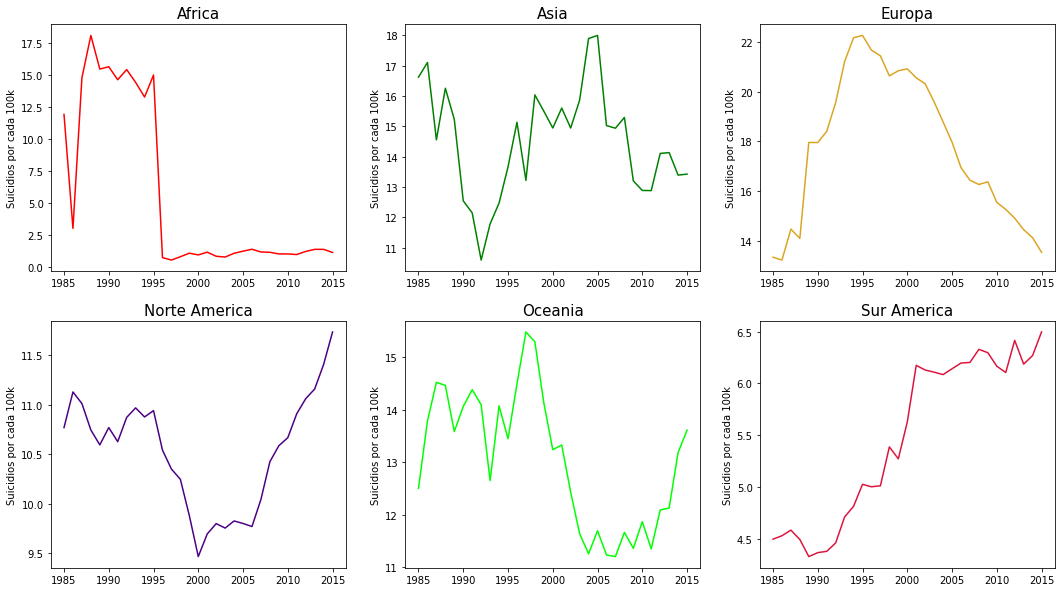

In [43]:
fonts = {'fontsize':15}
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.lineplot(ax=axes[0,0],x=years, y=AF,color="r")
axes[0,0].set_title("Africa",fontdict=fonts)
axes[0,0].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[0,1], x=years, y=AS,color="g")
axes[0,1].set_title("Asia",fontdict=fonts)
axes[0,1].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[0,2], x=years, y=EU,color="goldenrod")
axes[0,2].set_title("Europa",fontdict=fonts)
axes[0,2].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[1,0], x=years, y=NA,color="indigo")
axes[1,0].set_title("Norte America",fontdict=fonts)
axes[1,0].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[1,1], x=years, y=OC,color="lime")
axes[1,1].set_title("Oceania",fontdict=fonts)
axes[1,1].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[1,2], x=years, y=SA,color="crimson")
axes[1,2].set_title("Sur America",fontdict=fonts)
axes[1,2].set_ylabel("Suicidios por cada 100k")


## Insights Importantes
* Europa es el continente con mas suicidios por cada 100k habitantes. A lo largo de los años. Aunque ha sido reducido de manera importante.
* Africa no contiene suficiente informacion para dar un panorama completo.
* Asia y Oceania mantienen una tendencia regular. (teniendo picos altos y bajos). Ocenia va a la alza.
* Norte America y Sur America han ido a la alza. 
* Sur America aunque vaya a la alza tiene la mitad de tendencia que el resto de continentes.

## Por Sexo.

In [62]:
df.head(4)
sexo = df["sex"].unique().tolist()
sexo.sort()

In [47]:
df_sexo = df[["year","sex","suicides_no","population"]]

In [49]:
df_groupT_C2 = df_sexo.groupby("sex")

In [51]:
for names,groups in df_groupT_C2:
    print(names)
    print(groups)

female
       year     sex  suicides_no  population
2      1987  female           14      289700
5      1987  female            1       35600
6      1987  female            6      278800
7      1987  female            4      257200
9      1987  female            0      311000
...     ...     ...          ...         ...
27648  2014  female          162     2735238
27649  2014  female          107     3620833
27650  2014  female            9      348465
27652  2014  female           44     2631600
27653  2014  female           21     1438935

[13827 rows x 4 columns]
male
       year   sex  suicides_no  population
0      1987  male           21      312900
1      1987  male           16      308000
3      1987  male            1       21800
4      1987  male            9      274300
8      1987  male            1      137500
...     ...   ...          ...         ...
27643  2014  male          318     2739150
27645  2014  male          144     1271111
27646  2014  male          347     

In [54]:
population_CS = df_groupT_C2["population"].sum()

In [55]:
suicides_CS = df_groupT_C2["suicides_no"].sum()

In [66]:
suicides_per_100k_CS = (suicides_CS/population_CS)*100000
suicides_per_100k_CS = list(suicides_per_100k_CS)
suicides_per_100k_CS

[5.937291977036794, 20.720751858224894]

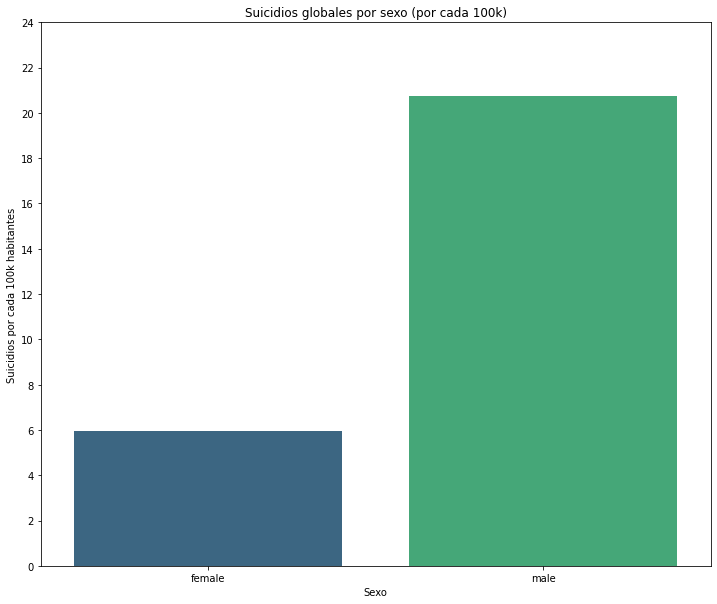

In [67]:
plt.figure(figsize=(12,10))
plt.title("Suicidios globales por sexo (por cada 100k)")
plt.ylim([0,20])
plt.ylabel("Suicidios por cada 100k habitantes")
plt.yticks(np.arange(0,25,step=2))
plt.xlabel("Sexo")
sns.barplot(x = sexo ,y = suicides_per_100k_CS,palette = "viridis")
plt.show()

## Tendencia a lo largo de los años por sexo.

In [70]:
df_groupT_C3 = df.groupby(["year","sex"])

In [71]:
for names,groups in df_groupT_C3:
    print(names)
    print(groups)

(1985, 'female')
                   country  year     sex          age  suicides_no  \
264    Antigua and Barbuda  1985  female  15-24 years            0   
265    Antigua and Barbuda  1985  female  25-34 years            0   
266    Antigua and Barbuda  1985  female  35-54 years            0   
267    Antigua and Barbuda  1985  female   5-14 years            0   
268    Antigua and Barbuda  1985  female  55-74 years            0   
...                    ...   ...     ...          ...          ...   
27060              Uruguay  1985  female    75+ years            4   
27061              Uruguay  1985  female  35-54 years           16   
27062              Uruguay  1985  female  15-24 years            5   
27063              Uruguay  1985  female  25-34 years            3   
27064              Uruguay  1985  female   5-14 years            2   

       population  suicides/100k pop             country-year  \
264          7709               0.00  Antigua and Barbuda1985   
265         

[390 rows x 12 columns]
(1994, 'female')
          country  year     sex          age  suicides_no  population  \
62        Albania  1994  female    75+ years            2       39900   
66        Albania  1994  female  15-24 years            6      282600   
67        Albania  1994  female  25-34 years            4      261100   
68        Albania  1994  female  35-54 years            2      342500   
69        Albania  1994  female  55-74 years            1      174600   
...           ...   ...     ...          ...          ...         ...   
27444  Uzbekistan  1994  female  55-74 years           53      940400   
27445  Uzbekistan  1994  female  15-24 years          110     2132800   
27446  Uzbekistan  1994  female  25-34 years           77     1759900   
27447  Uzbekistan  1994  female  35-54 years           74     1774300   
27449  Uzbekistan  1994  female   5-14 years            3     2890400   

       suicides/100k pop    country-year  gdp_for_year ($)   \
62                 

          country  year     sex          age  suicides_no  population  \
168       Albania  2003  female    75+ years            6       49088   
172       Albania  2003  female  15-24 years           14      283709   
173       Albania  2003  female  55-74 years            9      195699   
175       Albania  2003  female  25-34 years            9      222941   
176       Albania  2003  female  35-54 years           13      381760   
...           ...   ...     ...          ...          ...         ...   
27552  Uzbekistan  2003  female  25-34 years           99     1962726   
27553  Uzbekistan  2003  female    75+ years           10      237495   
27554  Uzbekistan  2003  female  55-74 years           31      877339   
27555  Uzbekistan  2003  female  35-54 years           77     2675118   
27557  Uzbekistan  2003  female   5-14 years           11     3085543   

       suicides/100k pop    country-year  gdp_for_year ($)   \
168                12.22     Albania2003      5,746,945,913 

[504 rows x 12 columns]
(2012, 'female')
                   country  year     sex          age  suicides_no  \
540    Antigua and Barbuda  2012  female  15-24 years            0   
541    Antigua and Barbuda  2012  female  25-34 years            0   
542    Antigua and Barbuda  2012  female  35-54 years            0   
543    Antigua and Barbuda  2012  female   5-14 years            0   
544    Antigua and Barbuda  2012  female  55-74 years            0   
...                    ...   ...     ...          ...          ...   
27624           Uzbekistan  2012  female  25-34 years          148   
27625           Uzbekistan  2012  female  35-54 years           89   
27627           Uzbekistan  2012  female  55-74 years           25   
27628           Uzbekistan  2012  female    75+ years            4   
27629           Uzbekistan  2012  female   5-14 years           16   

       population  suicides/100k pop             country-year  \
540          8435               0.00  Antigua and Bar

In [76]:
population_CSY = df_groupT_C3["population"].sum()

In [83]:
suicides_CSY = df_groupT_C3["suicides_no"].sum()
suicides_CSY

year  sex   
1985  female     32479
      male       83584
1986  female     33852
      male       86818
1987  female     35006
                 ...  
2014  male      171178
2015  female     47248
      male      156392
2016  female      3452
      male       11728
Name: suicides_no, Length: 64, dtype: int64

In [81]:
suicides_per_100k_CSY = (suicides_CSY/population_CSY)*100000
suicides_per_100k_CSY = list(suicides_per_100k_CSY)
len(suicides_per_100k_CSY)

64

In [84]:
male = suicides_per_100k_CSY[1::2]
female = suicides_per_100k_CSY[0::2]

In [90]:
male = list(male[:-1])
female = list(female[:-1])

Text(0, 0.5, 'Suicidios por cada 100k')

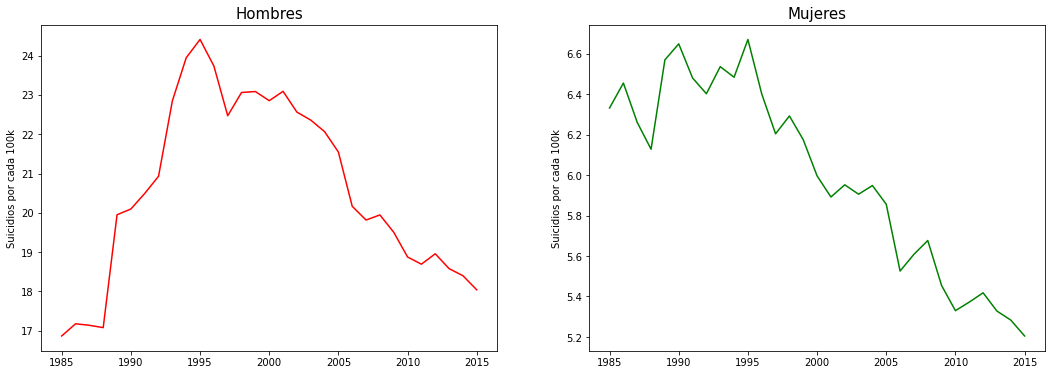

In [95]:
fonts = {'fontsize':15}
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.lineplot(ax=axes[0],x=years, y=male,color="r")
axes[0].set_title("Hombres",fontdict=fonts)
axes[0].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[1], x=years, y=female,color="g")
axes[1].set_title("Mujeres",fontdict=fonts)
axes[1].set_ylabel("Suicidios por cada 100k")

### Insights
* En proporcion los hombres cometen mas suicidios que las mujeres casi 3.5 mas.
* El pico mas alto fue en ambos casos 1995.
* En ambos sexos ha ido disminuyendo la tendencia de forma consistente.
* A pesar que ha bajado el de hombres sigue siendo casi 3 veces superior al de mujeres.

## Por edad.

In [117]:
df.head(3)
age = df["age"].unique().tolist()
age1 = ["15-24 years","25-34 years","35-54 years","5-14 years","55-74 years","75+ years"]

In [97]:
df_edad = df[["year","age","suicides_no","population"]]
df_edad.head(2)

year          age  suicides_no  population
0  1987  15-24 years           21      312900
1  1987  35-54 years           16      308000

In [105]:
df_groupT_C4 = df_edad.groupby(["age"])

In [106]:
for names,groups in df_groupT_C4:
    print(names)
    print(groups)

15-24 years
       year          age  suicides_no  population
0      1987  15-24 years           21      312900
2      1987  15-24 years           14      289700
13     1988  15-24 years           17      319200
17     1988  15-24 years            8      295600
28     1989  15-24 years           12      323500
...     ...          ...          ...         ...
27622  2012  15-24 years          311     3199204
27632  2013  15-24 years          323     3039740
27633  2013  15-24 years          320     3171202
27644  2014  15-24 years          347     2992817
27646  2014  15-24 years          347     3126905

[4614 rows x 4 columns]
25-34 years
       year          age  suicides_no  population
4      1987  25-34 years            9      274300
7      1987  25-34 years            4      257200
19     1988  25-34 years            5      262400
20     1988  25-34 years            5      279900
25     1989  25-34 years           18      283600
...     ...          ...          ...         ...
2

In [116]:
population_CA = df_groupT_C4["population"].sum()
population_CA

age
15-24 years     8639271272
25-34 years     8433721025
35-54 years    14370499935
5-14 years      8396058896
55-74 years     8800717153
75+ years       2662693294
Name: population, dtype: int64

In [110]:
suicides_CA = df_groupT_C4["suicides_no"].sum()

In [112]:
suicides_per_100k_CA = (suicides_CA/population_CA)*100000
suicides_per_100k_CA = list(suicides_per_100k_CA)

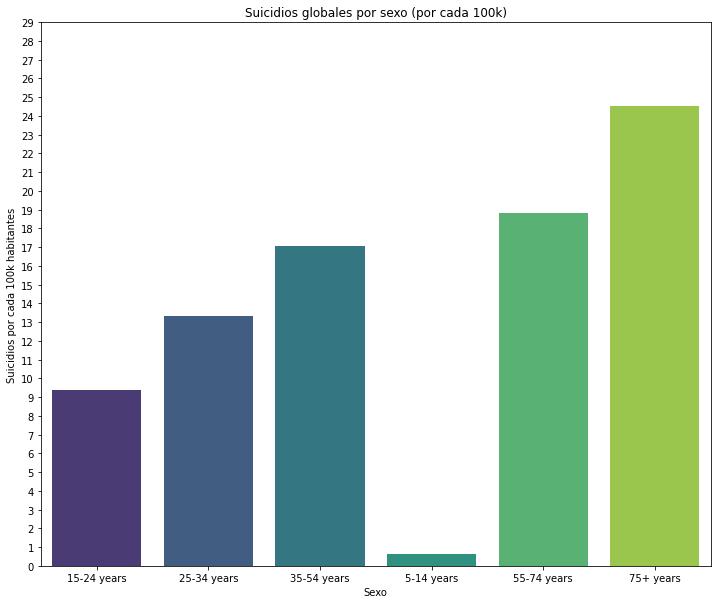

In [120]:
plt.figure(figsize=(12,10))
plt.title("Suicidios globales por sexo (por cada 100k)")
plt.ylim([0,20])
plt.ylabel("Suicidios por cada 100k habitantes")
plt.yticks(np.arange(0,30,step=1))
plt.xlabel("Sexo")
sns.barplot(x = age1 ,y = suicides_per_100k_CA,palette = "viridis")
plt.show()

## Tendencia de suicidios por edad a lo largo de los años

In [121]:
df_groupT_C5 = df.groupby(["year","age"])

In [122]:
for names,groups in df_groupT_C5:
    print(names)
    print(groups)

(1985, '15-24 years')
                   country  year     sex          age  suicides_no  \
264    Antigua and Barbuda  1985  female  15-24 years            0   
270    Antigua and Barbuda  1985    male  15-24 years            0   
594              Argentina  1985    male  15-24 years          156   
597              Argentina  1985  female  15-24 years           69   
1429             Australia  1985    male  15-24 years          315   
...                    ...   ...     ...          ...          ...   
26319       United Kingdom  1985  female  15-24 years           86   
26686        United States  1985    male  15-24 years         4267   
26691        United States  1985  female  15-24 years          854   
27059              Uruguay  1985    male  15-24 years           16   
27062              Uruguay  1985  female  15-24 years            5   

       population  suicides/100k pop             country-year  \
264          7709               0.00  Antigua and Barbuda1985   
270    

[104 rows x 12 columns]
(1989, '35-54 years')
                   country  year     sex          age  suicides_no  \
26                 Albania  1989    male  35-54 years           15   
29                 Albania  1989  female  35-54 years            7   
314    Antigua and Barbuda  1989  female  35-54 years            0   
320    Antigua and Barbuda  1989    male  35-54 years            0   
638              Argentina  1989    male  35-54 years          462   
...                    ...   ...     ...          ...          ...   
26365       United Kingdom  1989  female  35-54 years          353   
26733        United States  1989    male  35-54 years         6814   
26735        United States  1989  female  35-54 years         2159   
27104              Uruguay  1989    male  35-54 years           78   
27111              Uruguay  1989  female  35-54 years           17   

       population  suicides/100k pop             country-year  \
26         318400               4.71            

[130 rows x 12 columns]
(1993, '35-54 years')
                   country  year     sex          age  suicides_no  \
53                 Albania  1993    male  35-54 years           10   
55                 Albania  1993  female  35-54 years            7   
363    Antigua and Barbuda  1993  female  35-54 years            0   
368    Antigua and Barbuda  1993    male  35-54 years            0   
686              Argentina  1993    male  35-54 years          495   
...                    ...   ...     ...          ...          ...   
26783        United States  1993  female  35-54 years         2362   
27128              Uruguay  1993    male  35-54 years           88   
27133              Uruguay  1993  female  35-54 years           32   
27426           Uzbekistan  1993    male  35-54 years          332   
27435           Uzbekistan  1993  female  35-54 years           60   

       population  suicides/100k pop             country-year  \
53         350300               2.85            

[158 rows x 12 columns]
(1998, '5-14 years')
                   country  year     sex         age  suicides_no  population  \
117                Albania  1998    male  5-14 years            2      388400   
118                Albania  1998  female  5-14 years            1      363800   
399    Antigua and Barbuda  1998  female  5-14 years            0        8183   
405    Antigua and Barbuda  1998    male  5-14 years            0        7706   
754              Argentina  1998  female  5-14 years           20     3353473   
...                    ...   ...     ...         ...          ...         ...   
26849        United States  1998  female  5-14 years           83    19112800   
27196              Uruguay  1998    male  5-14 years            4      274290   
27197              Uruguay  1998  female  5-14 years            0      262973   
27496           Uzbekistan  1998    male  5-14 years           53     3222800   
27497           Uzbekistan  1998  female  5-14 years            

[176 rows x 12 columns]
(2001, '35-54 years')
                   country  year     sex          age  suicides_no  \
145                Albania  2001    male  35-54 years           34   
150                Albania  2001  female  35-54 years           12   
432    Antigua and Barbuda  2001    male  35-54 years            2   
435    Antigua and Barbuda  2001  female  35-54 years            0   
783              Argentina  2001    male  35-54 years          625   
...                    ...   ...     ...          ...          ...   
26879        United States  2001  female  35-54 years         2893   
27224              Uruguay  2001    male  35-54 years          122   
27227              Uruguay  2001  female  35-54 years           42   
27522           Uzbekistan  2001    male  35-54 years          513   
27531           Uzbekistan  2001  female  35-54 years           93   

       population  suicides/100k pop             country-year  \
145        378826               8.98            

(2005, '55-74 years')
                   country  year     sex          age  suicides_no  \
196                Albania  2005  female  55-74 years            0   
202                Albania  2005    male  55-74 years            0   
484    Antigua and Barbuda  2005  female  55-74 years            0   
490    Antigua and Barbuda  2005    male  55-74 years            0   
829              Argentina  2005    male  55-74 years          489   
...                    ...   ...     ...          ...          ...   
26928        United States  2005  female  55-74 years         1364   
27271              Uruguay  2005    male  55-74 years          112   
27277              Uruguay  2005  female  55-74 years           26   
27571           Uzbekistan  2005    male  55-74 years           94   
27579           Uzbekistan  2005  female  55-74 years           21   

       population  suicides/100k pop             country-year  \
196        210998               0.00              Albania2005   
202    

[176 rows x 12 columns]
(2009, '5-14 years')
                   country  year     sex         age  suicides_no  population  \
243                Albania  2009  female  5-14 years            0      236174   
249                Albania  2009    male  5-14 years            0      253007   
531    Antigua and Barbuda  2009  female  5-14 years            0        8514   
537    Antigua and Barbuda  2009    male  5-14 years            0        8599   
886              Argentina  2009    male  5-14 years           34     3553154   
...                    ...   ...     ...         ...          ...         ...   
26981        United States  2009  female  5-14 years           90    20181953   
27328              Uruguay  2009  female  5-14 years            1      253321   
27329              Uruguay  2009    male  5-14 years            0      263516   
27592           Uzbekistan  2009    male  5-14 years           37     2805898   
27593           Uzbekistan  2009  female  5-14 years           1

[160 rows x 12 columns]
(2013, '75+ years')
                   country  year     sex        age  suicides_no  population  \
557    Antigua and Barbuda  2013  female  75+ years            0        1652   
563    Antigua and Barbuda  2013    male  75+ years            0        1072   
924              Argentina  2013    male  75+ years          168      699046   
933              Argentina  2013  female  75+ years           29     1303352   
1212               Armenia  2013    male  75+ years            7       58640   
...                    ...   ...     ...        ...          ...         ...   
27027        United States  2013  female  75+ years          431    11486590   
27354              Uruguay  2013    male  75+ years           63       79099   
27359              Uruguay  2013  female  75+ years           23      157260   
27635           Uzbekistan  2013    male  75+ years           13      221002   
27638           Uzbekistan  2013  female  75+ years            8      345180

In [124]:
population_CAY = df_groupT_C5["population"].sum()

In [126]:
suicides_CAY = df_groupT_C5["suicides_no"].sum()

In [144]:
suicides_per_100k_CAY = (suicides_CAY/population_CAY)*100000
suicides_per_100k_CAY.head(8)

year  age        
1985  15-24 years     9.073091
      25-34 years    11.969983
      35-54 years    14.529562
      5-14 years      0.494039
      55-74 years    18.810908
      75+ years      29.826435
1986  15-24 years     9.066016
      25-34 years    12.306005
dtype: float64

In [134]:
G1 = suicides_per_100k_CAY[0::6]
G1 = list(G1[:-1])
len(G1)

31

In [135]:
G2 = suicides_per_100k_CAY[1::6]
G2 = list(G2[:-1])
len(G2)

31

In [137]:
G3 = suicides_per_100k_CAY[2::6]
G3 = list(G3[:-1])
len(G3)

31

In [138]:
G4 = suicides_per_100k_CAY[3::6]
G4 = list(G4[:-1])
len(G4)

31

In [139]:
G5 = suicides_per_100k_CAY[4::6]
G5 = list(G5[:-1])
len(G5)

31

In [142]:
G6 = suicides_per_100k_CAY[5::6]
G6 = list(G6)
len(G6)

31

Text(0, 0.5, 'Suicidios por cada 100k')

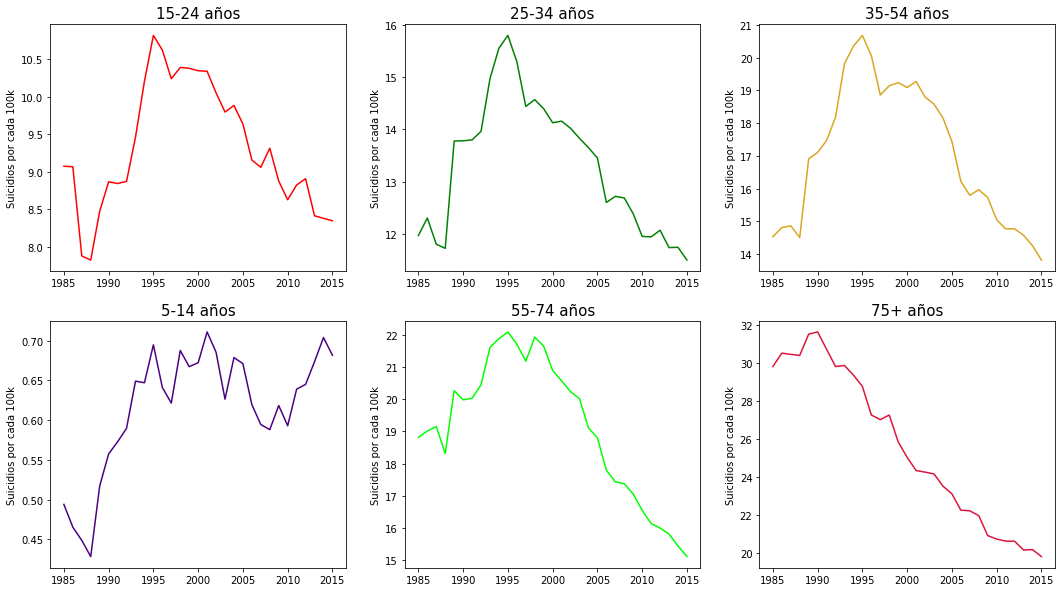

In [145]:
fonts = {'fontsize':15}
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.lineplot(ax=axes[0,0],x=years, y=G1,color="r")
axes[0,0].set_title("15-24 años",fontdict=fonts)
axes[0,0].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[0,1], x=years, y=G2,color="g")
axes[0,1].set_title("25-34 años",fontdict=fonts)
axes[0,1].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[0,2], x=years, y=G3,color="goldenrod")
axes[0,2].set_title("35-54 años",fontdict=fonts)
axes[0,2].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[1,0], x=years, y=G4,color="indigo")
axes[1,0].set_title("5-14 años",fontdict=fonts)
axes[1,0].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[1,1], x=years, y=G5,color="lime")
axes[1,1].set_title("55-74 años",fontdict=fonts)
axes[1,1].set_ylabel("Suicidios por cada 100k")
sns.lineplot(ax=axes[1,2], x=years, y=G6,color="crimson")
axes[1,2].set_title("75+ años",fontdict=fonts)
axes[1,2].set_ylabel("Suicidios por cada 100k")


## Insights
* A excepcion del grupo 5-14 años los otros grupos han disminuido de forma considerable.
* A pesar de que el grupo de +75 ha ido en reduccion sigue siendo mayor que el resto de grupos de edad.
* Conforme mas avanzan las edades aumenta su proporcion de suicidios.
* A pesar de ser el mas bajo el grupo 5-14 ha ido en aumento en los años mas recientes.

# Por pais

In [220]:
countries = df["country"].unique().tolist()
df.head(2)
countries

['Albania',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kiribati',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Macau',
 'Maldives',
 'Malta',
 'Mauritius',
 'Mexico',
 'Montenegro',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Norway',
 'Panama',
 'Paraguay',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Republic of Korea',
 'Romania',
 'Russian Federation',
 'Saint Lucia',
 'Saint Vincent and Grenadines',
 'Serbia',
 'Seychelles',
 'Singapor

In [151]:
df_paises = df[["country","year","suicides_no","population"]]
df_paises.head(2)

country  year  suicides_no  population
0  Albania  1987           21      312900
1  Albania  1987           16      308000

In [152]:
df_groupT_C6 = df_paises.groupby("country")

In [153]:
for names,groups in df_groupT_C6:
    print(names)
    print(groups)

Albania
     country  year  suicides_no  population
0    Albania  1987           21      312900
1    Albania  1987           16      308000
2    Albania  1987           14      289700
3    Albania  1987            1       21800
4    Albania  1987            9      274300
..       ...   ...          ...         ...
259  Albania  2010           12      394593
260  Albania  2010            7      241491
261  Albania  2010            6      263581
262  Albania  2010            2      223969
263  Albania  2010            0      240939

[264 rows x 4 columns]
Antigua and Barbuda
                 country  year  suicides_no  population
264  Antigua and Barbuda  1985            0        7709
265  Antigua and Barbuda  1985            0        6344
266  Antigua and Barbuda  1985            0        6173
267  Antigua and Barbuda  1985            0        7339
268  Antigua and Barbuda  1985            0        3778
..                   ...   ...          ...         ...
583  Antigua and Barbuda  20

[372 rows x 4 columns]
Italy
      country  year  suicides_no  population
12740   Italy  1985          542     1107700
12741   Italy  1985         1307     4991500
12742   Italy  1985          902     7267900
12743   Italy  1985          239     1961500
12744   Italy  1985          596     6003500
...       ...   ...          ...         ...
13107   Italy  2015          320     9386928
13108   Italy  2015           64     3394610
13109   Italy  2015           34     2874645
13110   Italy  2015            7     2944182
13111   Italy  2015            6     2775414

[372 rows x 4 columns]
Jamaica
       country  year  suicides_no  population
13112  Jamaica  1985            1       29000
13113  Jamaica  1985            1       38000
13114  Jamaica  1985            3      259000
13115  Jamaica  1985            1      156000
13116  Jamaica  1985            1      169000
...        ...   ...          ...         ...
13311  Jamaica  2011            1      168398
13312  Jamaica  2011           

      country  year  suicides_no  population
24202  Sweden  1987          124      247100
24203  Sweden  1987          394     1124000
24204  Sweden  1987          281      819700
24205  Sweden  1987          174      580200
24206  Sweden  1987           73      397900
...       ...   ...          ...         ...
24555  Sweden  2016          119     1257582
24556  Sweden  2016          104     1120938
24557  Sweden  2016           45      493341
24558  Sweden  2016           44      641572
24559  Sweden  2016           36      570983

[358 rows x 4 columns]
Switzerland
           country  year  suicides_no  population
24560  Switzerland  1995          146      165500
24561  Switzerland  1995          262      593600
24562  Switzerland  1995          358     1026800
24563  Switzerland  1995          146      585400
24564  Switzerland  1995          104      429600
...            ...   ...          ...         ...
24807  Switzerland  2015           82      922222
24808  Switzerland  2015

In [155]:
population_CP = df_groupT_C6["population"].sum()

In [303]:
suicides_CP = df_groupT_C6["suicides_no"].sum()

In [305]:
suicides_per_100k_CP = (suicides_CP/population_CP)*100000
suicides_per_100k_CP

country
Albania                  3.160827
Antigua and Barbuda      0.552700
Argentina                7.936309
Armenia                  2.462889
Aruba                    8.017928
                          ...    
United Arab Emirates     1.704003
United Kingdom           7.867928
United States           12.838459
Uruguay                 15.627650
Uzbekistan               7.154891
Length: 94, dtype: float64

In [306]:
suicides_per_100k_CP = list(suicides_per_100k_CP)

In [171]:
#Ordenando de mayor a menor para mejor vista del grafico.
size= len(suicides_per_100k_CP)
indice = [i for i in range(0,size)]
zipped = list(zip(indice,suicides_per_100k_CP))
sorted_list = sorted(zipped,key=lambda x: x[1] )

In [188]:
unziped = list(zip(*sorted_list))
index = str(unziped[0])
index

'(42, 1, 52, 78, 8, 7, 34, 46, 89, 63, 86, 3, 67, 35, 9, 10, 0, 31, 22, 28, 62, 33, 55, 14, 18, 61, 72, 53, 13, 71, 25, 59, 40, 19, 84, 74, 45, 93, 87, 41, 51, 90, 2, 4, 56, 79, 66, 65, 26, 17, 57, 75, 47, 39, 54, 76, 69, 91, 5, 85, 16, 38, 60, 24, 58, 32, 82, 50, 92, 15, 64, 21, 23, 83, 81, 73, 68, 30, 20, 6, 36, 12, 43, 29, 88, 27, 77, 44, 48, 37, 11, 80, 70, 49)'

In [201]:
index1 = index.replace("("," ")
index1 = index1.replace(")"," ")
index1 = index1.split(",")
index1 = [int(i) for i in index1]
len(index1)

94

In [204]:
countries1=[]
for i in index1:
    countries1.append(countries[i])

len(countries1)

94

In [207]:
suicides_per_100k_CP1 = []
for i in index1:
    suicides_per_100k_CP1.append(suicides_per_100k_CP[i])
len(suicides_per_100k_CP1)

94

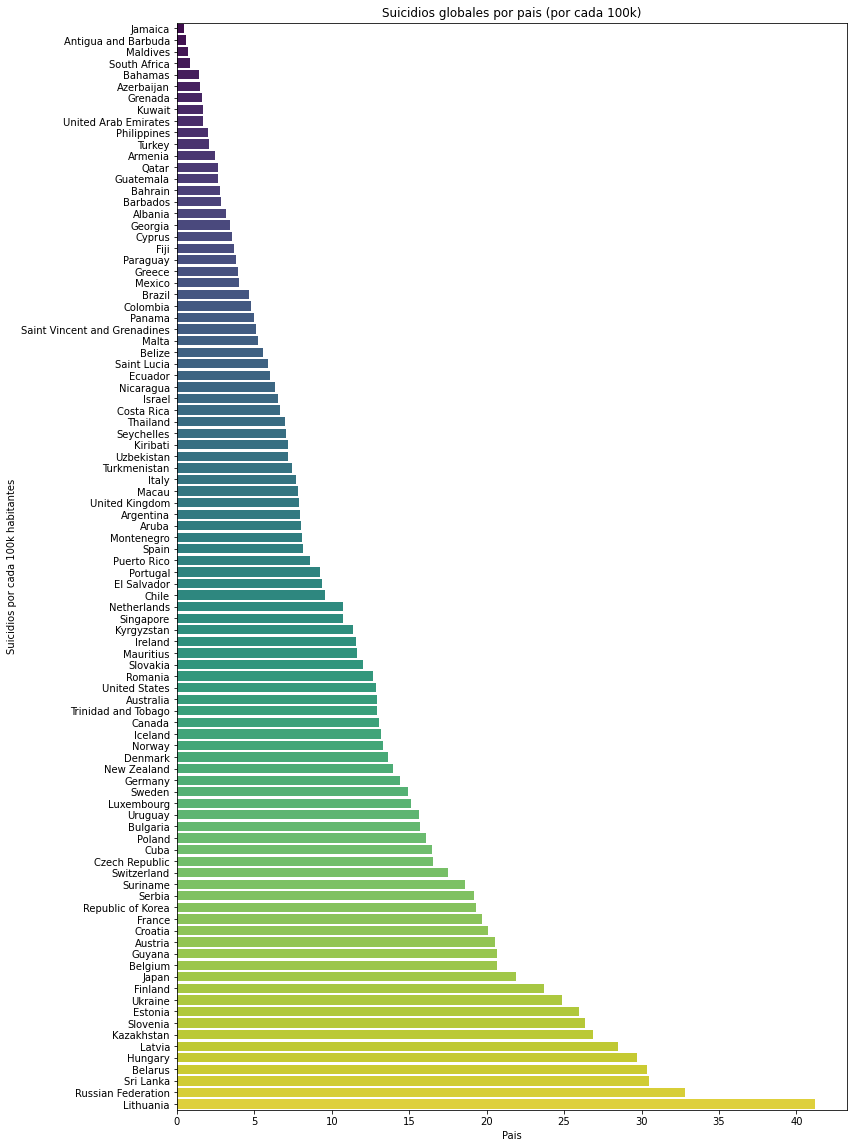

In [206]:
plt.figure(figsize=(12,20))
plt.title("Suicidios globales por pais (por cada 100k)")
plt.ylim([0,20])
plt.ylabel("Suicidios por cada 100k habitantes")
plt.yticks(np.arange(0,30,step=1))
plt.xlabel("Pais")
sns.barplot(x = suicides_per_100k_CP1 ,y = countries1,palette = "viridis")
plt.show()

## Mapa global.

In [379]:
#Utilizare Folium para eso
import folium

In [385]:
mapa = pd.read_csv("PaisesLocs.csv")
mapa["3"] = mapa["3"].fillna("NA")

In [386]:
mapa

Unnamed: 0                     0          1   3   2   latitude   longitude
0            0               Albania   3.160827  EU  AL  41.000028   19.999962
1            1   Antigua and Barbuda   0.552700  NA  AG  17.223472  -61.955461
2            2             Argentina   7.936309  SA  AR -34.996496  -64.967282
3            3               Armenia   2.462889  AS  AM  40.769627   44.673665
4            4                 Aruba   8.017928  NA  AW  12.490300  -69.960984
..         ...                   ...        ...  ..  ..        ...         ...
89          89  United Arab Emirates   1.704003  AS  AE  24.000249   53.999483
90          90        United Kingdom   7.867928  EU  GB  54.702354   -3.276575
91          91         United States  12.838459  NA  US  39.783730 -100.445882
92          92               Uruguay  15.627650  SA  UY -32.875555  -56.020153
93          93            Uzbekistan   7.154891  AS  UZ  41.323730   63.952810

[94 rows x 7 columns]

In [389]:
mapa["suicides_per_100k"] = suicides_per_100k_CP

In [390]:
world_geo = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'
world_geo

'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'

In [391]:
world_map = folium.Map(location=[0,0],zoom_start=2)

In [392]:
threshold_scale = np.linspace(mapa['suicides_per_100k'].min(),
                              mapa['suicides_per_100k'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() 
threshold_scale[-1] = threshold_scale[-1] + 1 

world_map.choropleth(
    geo_data= world_geo,
    data=mapa,
    columns=['0','suicides_per_100k'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Suicidios a nivel global',
    reset=True
)
world_map

/Users/antonioreyesguerrero/Desktop/PythonCurso/Datos/lib/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [388]:
mapa.at[91,'0']="United States of America"
mapa

Unnamed: 0                         0          1   3   2   latitude  \
0            0                   Albania   3.160827  EU  AL  41.000028   
1            1       Antigua and Barbuda   0.552700  NA  AG  17.223472   
2            2                 Argentina   7.936309  SA  AR -34.996496   
3            3                   Armenia   2.462889  AS  AM  40.769627   
4            4                     Aruba   8.017928  NA  AW  12.490300   
..         ...                       ...        ...  ..  ..        ...   
89          89      United Arab Emirates   1.704003  AS  AE  24.000249   
90          90            United Kingdom   7.867928  EU  GB  54.702354   
91          91  United States of America  12.838459  NA  US  39.783730   
92          92                   Uruguay  15.627650  SA  UY -32.875555   
93          93                Uzbekistan   7.154891  AS  UZ  41.323730   

     longitude  
0    19.999962  
1   -61.955461  
2   -64.967282  
3    44.673665  
4   -69.960984  
..         ...  
89   53.999483  
90   -3.276575  
91 -100.445882  
92  -56.020153  
93   63.952810  

[94 rows x 7 columns]